<a href="https://colab.research.google.com/github/Guhan2348519/demo/blob/main/RM_class_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Load cereal data from an Excel file
cereal_data=pd.read_excel('/content/cereal.xlsx')


In [21]:
#to load amd display first 10 data
cereal_data.head(10)

,name,mfr,Type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
5,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843
6,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.509541
7,Apple Jacks,K,C,110,2,0,125,1,11,14,30,25,2,1,1,33.174094
8,Basic 4,G,C,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.038562
9,Bran Chex,R,C,90,2,1,200,4,15,6,125,25,1,1,0.67,49.120253


In [7]:
#to describe the data types values
cereal_data.describe


<bound method NDFrame.describe of                          name          mfr         type calories protein  fat  \
0                      String  Categorical  Categorical      Int     Int  Int   
1                   100% Bran            N            C       70       4    1   
2           100% Natural Bran            Q            C      120       3    5   
3                    All-Bran            K            C       70       4    1   
4   All-Bran with Extra Fiber            K            C       50       4    0   
..                        ...          ...          ...      ...     ...  ...   
73                    Triples            G            C      110       2    1   
74                       Trix            G            C      110       1    1   
75                 Wheat Chex            R            C      100       3    1   
76                   Wheaties            G            C      100       3    1   
77        Wheaties Honey Gold            G            C      110       2   

In [8]:
#to count the no of empty spaces
cereal_data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [11]:
# to describe the top,freq,count ,unique value
cereal_data.describe()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
unique,78,8,3,12,7,6,28,14,23,18,37,4,4,8,13,78
top,String,K,C,110,3,1,0,0,13,3,110,25,3,1,1,Float
freq,1,23,74,29,28,30,9,19,8,13,5,63,36,64,30,1


In [22]:
# manufacturers (mfr) and cereal types (Type)
pd.crosstab(cereal_data.mfr, cereal_data.Type)

Type,C,Categorical,H
mfr,,,
A,0,0,1
Categorical,0,1,0
G,22,0,0
K,23,0,0
N,5,0,1
P,9,0,0
Q,7,0,1
R,8,0,0


In [24]:
#LabelEncoder for categorical label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cereal_data['Type'] = label_encoder.fit_transform(cereal_data['Type'])

In [25]:

counts =cereal_data['Type'].value_counts()

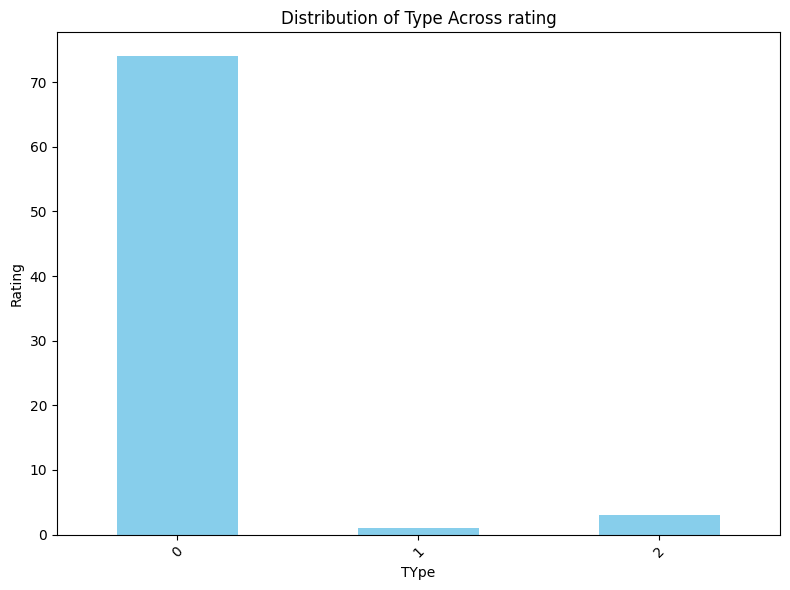

In [26]:
#bar plot to visualize the distribution of encoded type
plt.figure(figsize=(8, 6))
counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Type Across rating')
plt.xlabel('TYpe')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()

In [59]:
# Create a new column 'Calories_new' with binned categories
cereal_data['calories'] = pd.to_numeric(cereal_data['calories'], errors='coerce')
cereal_data['rating'] = pd.to_numeric(cereal_data['rating'], errors='coerce')
binning = [0, 43, 86, 129, 172]
types = ['Calories_under_43', 'Calories_under_86', 'Calories_under_129', 'Calories_under_172']

cereal_data['Calories_new'] = pd.cut(cereal_data['calories'], binning, labels=types)
print(cereal_data)

                         name          mfr  Type  calories protein  fat  \
0                      String  Categorical     1       NaN     Int  Int   
1                   100% Bran            N     0      70.0       4    1   
2           100% Natural Bran            Q     0     120.0       3    5   
3                    All-Bran            K     0      70.0       4    1   
4   All-Bran with Extra Fiber            K     0      50.0       4    0   
..                        ...          ...   ...       ...     ...  ...   
73                    Triples            G     0     110.0       2    1   
74                       Trix            G     0     110.0       1    1   
75                 Wheat Chex            R     0     100.0       3    1   
76                   Wheaties            G     0     100.0       3    1   
77        Wheaties Honey Gold            G     0     110.0       2    1   

   sodium  fiber  carbo sugars potass vitamins shelf weight   cups     rating  \
0     Int  Float  

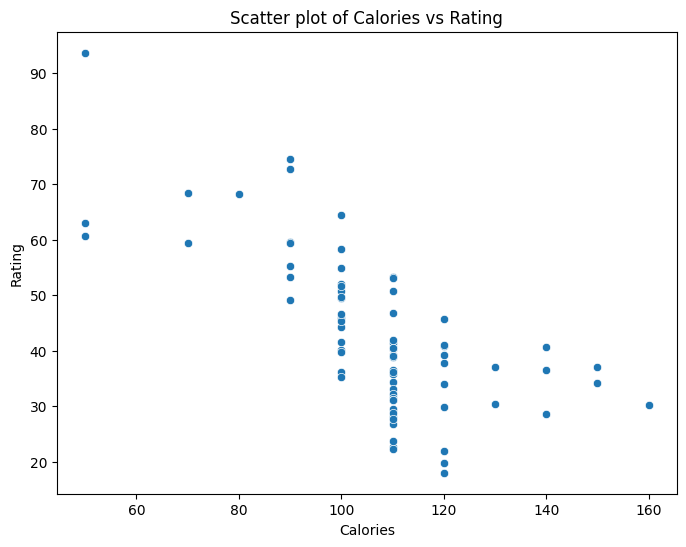

In [61]:
#to representation of scatter plot of calories vs rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cereal_data, x='calories', y='rating')
plt.title('Scatter plot of Calories vs Rating')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.show()

In [70]:
cereal_data = cereal_data.apply(pd.to_numeric, errors='coerce')


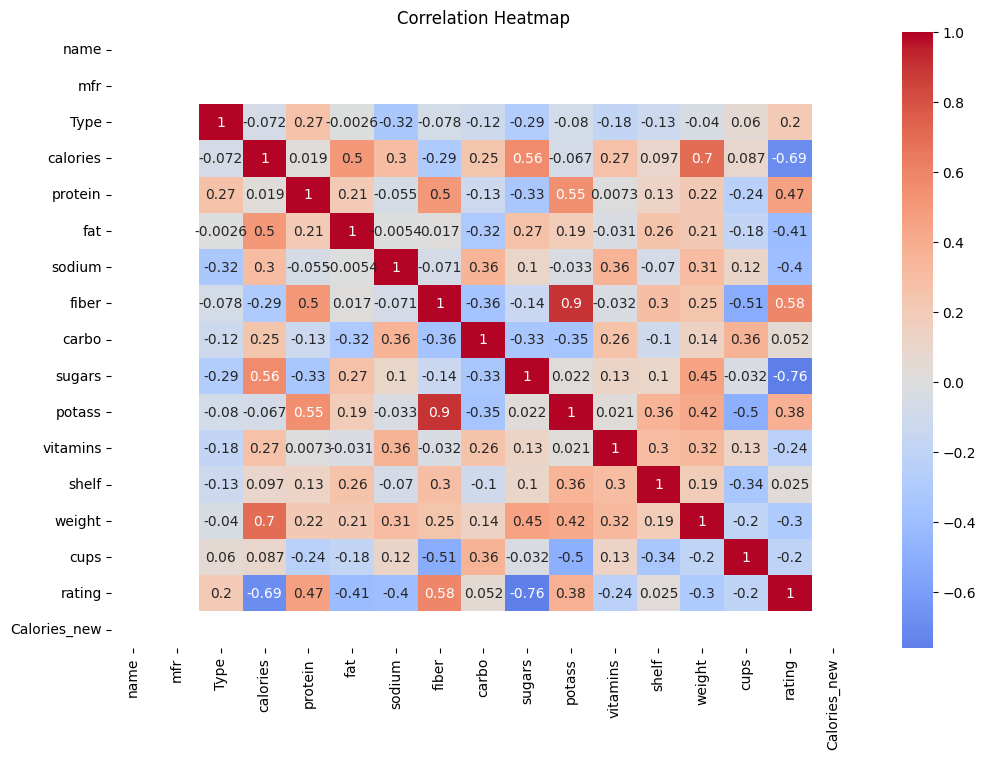

In [71]:
# tp visualize with correlation heatmap
correlation_matrix = cereal_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

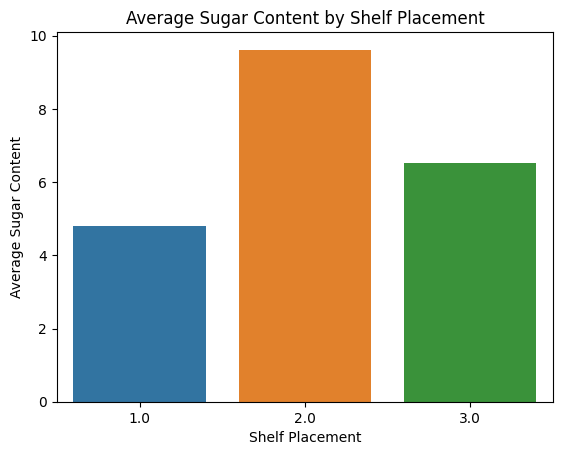

In [78]:
#to show average sugar content with shelf placement
avg_sugar_by_shelf = cereal_data.groupby('shelf')['sugars'].mean()
sns.barplot(x=avg_sugar_by_shelf.index, y=avg_sugar_by_shelf.values)
plt.title('Average Sugar Content by Shelf Placement')
plt.xlabel('Shelf Placement')
plt.ylabel('Average Sugar Content')
plt.show()